# Logistic Regression Using Scikit-Learn

The following topics are convered in this notebook

* Downloading a real-world dataset from kaggle
* Exploratory data analysis and visualization
* Splitting a dataset into training, valiation and test sets
* Filling/imputing missing values in numeric columns
* Scaling numeric features to a (0,1) range
* Encoding categorical columns as one-hot vactors
* Training a logistic regression model using Scikit-learn
* Evaluating a model using a validataion set and test set
* Saving a model to disk and loading it back

In [60]:
import requests, zipfile, pathlib
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [61]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [62]:
!pip install opendatasets --upgrade --quiet

In [63]:
import opendatasets as od

In [64]:
# # Set up our dataset path

# data_path = Path("data/")
# dataset_path = data_path / "weather_Austrailia"

# # If dataset path does not exist, make it
# if dataset_path.is_dir():
#   print(f"{dataset_path} already exists, skipping creation")

# else:
#   print(f"{dataset_path} does not exist, creating one...")
#   dataset_path.mkdir(parents = True, exist_ok = True)

# # Download dataset from github
# with open(data_path / "archive.zip", "wb") as f:
#   request = requests.get(("https://github.com/Musawer-Afzal/ML-with-Scikit-Learn-in-Python/raw/refs/heads/master/Datasets/archive.zip"))
#   print("Downloading Austrailia Weather Dataset")
#   f.write(request.content)

# # Unzip the dataset if zip file
# with zipfile.ZipFile(data_path / "archive.zip", "r") as zip_ref:
#   print("Unzipping Weather dataset")
#   zip_ref.extractall(dataset_path)

In [65]:
# df = pd.read_csv("/content/data/weather_Austrailia/weatherAUS.csv")

In [66]:
# df

In [67]:
# df.info()

In [68]:
# df.describe()

## Classification Problems

It is very important to know the difference between Classification Problem and Regression problem.

One of the hint is that if each of the input must be assigned a discrete category(also called label or class), are known as *classification* problem

Classification problems solution can have a binary answer (yes/no), or can be a multiclass classification (picking one of many classes)

## Regression Problems

Problems where a continuous numeric value must be predicted for each input are known as regression problems

For Example:

* Medical Charges Prediction
* House Price Prediction
* Ocean Temperature Prediction
* Weather Temperature Prediction

### Logistic Regression for Solving Classification Problems

Logistic regression is a commonly used technique for solving binary classification problems. In  a logistic regression model:

* we take linear combination (or weighted sum of the input features)
* we apply the sigmoid function to the result to obtain a number between 0 and 1
* this number represents the probability of the input being classified as "Yes"
* instead of **RMSE**, the cross entropy loss function is used to evaluate the results

### Downloading the Data

We'll use the `opendatasets library` to download the data from kaggle directly within jupyter. Let's install and import `opendatasets`

Now we can download the dataset using `od.download`. When we execute `od.download` we'll be asked to provide our kaggle username and API key.

In [69]:
dataset_url = 'https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package'

In [70]:
od.download(dataset_url)

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [71]:
data_dir = '/content/weather-dataset-rattle-package'

In [72]:
os.listdir(data_dir)

['weatherAUS.csv']

In [73]:
train_csv = data_dir + '/weatherAUS.csv'

In [74]:
train_csv

'/content/weather-dataset-rattle-package/weatherAUS.csv'

In [75]:
raw_df = pd.read_csv(train_csv)

In [76]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [77]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

We can see that most of the columns do not have all the values which is fine since this is how real world data is.

The problem is that we are missing some values of `RainToday` and `RainTomorrow` which is the information we actually need.

We can remove the rows where there is missing data.

In [78]:
raw_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [79]:
raw_df.dropna(subset = ['RainToday', 'RainTomorrow'], inplace = True)

In [80]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

## Exploratory Data Analysis and Visualization
Before we start working on our model, we need to understand the relationship between the various columns and our target column

In [81]:
px.histogram(raw_df, x = 'Location', title = 'Location VS Rainy Days', color = 'RainToday')

In [82]:
px.histogram(raw_df,
             x = 'Temp3pm',
             title = 'Temperature at 3pm VS Rain Tomorrow',
             color = 'RainTomorrow')

In [83]:
px.histogram(raw_df,
             x = 'RainTomorrow',
             title = 'Rain Tomorrow VS Rain Today',
             color = 'RainToday')

In [84]:
px.scatter(raw_df.sample(2000),
           title = 'Min Temp VS Max Temp.',
           x = 'MinTemp',
           y = 'MaxTemp',
           color = 'RainToday')

In [85]:
px.strip(raw_df.sample(2000),
           title = "Temp 3pm VS Humidity 3 pm",
           x = "Temp3pm",
           y = "Humidity3pm",
           color = "RainTomorrow")

In [86]:
use_sample = False
sample_fraction = 0.1
if use_sample:
  raw_df = raw_df.sample(frac = sample_fraction).copy()

## Training, Validation and Test Sets

**Training set** - Used to train the model

**Validation set** - Used to evaluate the model during training, tune model hyperparameters and pick up the best verison of the model.

**Test set** - Used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data our model will encounter in real world

In [87]:
train_val_df, test_df = train_test_split(raw_df, test_size = 0.2, random_state = 42)
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, random_state = 42)

In [88]:
print(f"train_df.shape: {train_df.shape}")
print(f"val_df.shape: {val_df.shape}")
print(f"test_df.shape: {test_df.shape}")

train_df.shape: (84471, 23)
val_df.shape: (28158, 23)
test_df.shape: (28158, 23)


<Axes: title={'center': 'No. of Rows per year'}, xlabel='Date', ylabel='count'>

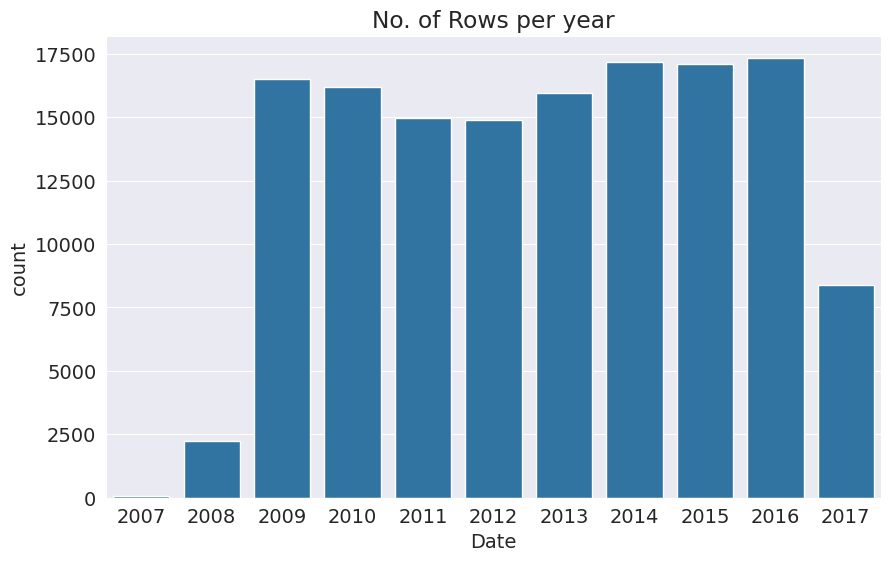

In [89]:
plt.title('No. of Rows per year')
sns.countplot(x = pd.to_datetime(raw_df.Date).dt.year)

What we can do is use the data till 2014 as training set and 2015 as validation set and 2016 and 2017 as test set.

We are going to predict the weather for 2018 and 2019

In [90]:
year = pd.to_datetime(raw_df.Date).dt.year
train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

print(f"train_df.shape: {train_df.shape}")
print(f"val_df.shape: {val_df.shape}")
print(f"test_df.shape: {test_df.shape}")

train_df.shape: (97988, 23)
val_df.shape: (17089, 23)
test_df.shape: (25710, 23)


In [91]:
train_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,2014-12-27,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,...,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No,No
144549,2014-12-28,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,...,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No,No
144550,2014-12-29,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,...,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No,No
144551,2014-12-30,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,...,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No,No


In [92]:
val_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2133,2015-01-01,Albury,11.4,33.5,0.0,NaN,NaN,WSW,30.0,ESE,...,45.0,14.0,1013.5,1011.0,NaN,NaN,21.0,32.7,No,No
2134,2015-01-02,Albury,15.5,39.6,0.0,NaN,NaN,NE,56.0,ESE,...,45.0,12.0,1016.0,1012.4,NaN,NaN,25.6,38.2,No,No
2135,2015-01-03,Albury,17.1,38.3,0.0,NaN,NaN,NNE,48.0,NE,...,35.0,19.0,1017.9,1012.3,NaN,NaN,29.2,37.0,No,No
2136,2015-01-04,Albury,26.0,33.1,0.0,NaN,NaN,NNE,41.0,ESE,...,46.0,37.0,1013.6,1012.1,8.0,5.0,27.4,30.9,No,No
2137,2015-01-05,Albury,19.0,35.2,0.0,NaN,NaN,E,33.0,SSE,...,60.0,34.0,1017.4,1014.7,8.0,NaN,25.6,32.5,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144913,2015-12-27,Uluru,20.5,34.7,0.0,NaN,NaN,E,52.0,ESE,...,23.0,12.0,1013.2,1010.1,NaN,NaN,24.3,33.0,No,No
144914,2015-12-28,Uluru,18.0,36.4,0.0,NaN,NaN,ESE,54.0,E,...,17.0,7.0,1014.7,1010.9,NaN,NaN,26.7,35.0,No,No
144915,2015-12-29,Uluru,17.5,37.1,0.0,NaN,NaN,E,56.0,E,...,12.0,7.0,1012.6,1007.5,NaN,NaN,28.1,34.7,No,No
144916,2015-12-30,Uluru,20.0,38.9,0.0,NaN,NaN,E,59.0,E,...,12.0,12.0,1007.2,1002.6,NaN,1.0,31.3,38.4,No,No


In [93]:
test_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2498,2016-01-01,Albury,20.4,37.6,0.0,NaN,NaN,ENE,54.0,NaN,...,46.0,17.0,1013.4,1009.2,7.0,3.0,26.1,36.7,No,No
2499,2016-01-02,Albury,20.9,33.6,0.4,NaN,NaN,SSE,50.0,SSE,...,54.0,30.0,1011.1,1008.4,8.0,8.0,24.8,31.7,No,Yes
2500,2016-01-03,Albury,18.4,23.1,2.2,NaN,NaN,ENE,48.0,ESE,...,62.0,67.0,1014.0,1014.8,8.0,8.0,21.8,19.5,Yes,Yes
2501,2016-01-04,Albury,17.3,23.7,15.6,NaN,NaN,SSE,39.0,SE,...,74.0,65.0,1017.9,1016.5,8.0,8.0,19.2,21.6,Yes,Yes
2502,2016-01-05,Albury,15.5,22.9,6.8,NaN,NaN,ENE,31.0,SE,...,92.0,63.0,1016.3,1013.9,8.0,8.0,17.2,22.2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


Let's identify the input and traget columns

In [94]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [95]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [99]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [96]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [97]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,SSE,...,26.0,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No
144549,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,SW,...,20.0,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No
144550,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,SSE,...,9.0,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No
144551,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,SSW,...,17.0,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No


In [98]:
train_targets

,RainTomorrow
0,No
1,No
2,No
3,No
4,No
...,...
144548,No
144549,No
144550,No
144551,No


In [101]:
test_targets

,RainTomorrow
2498,No
2499,Yes
2500,Yes
2501,Yes
2502,No
...,...
145454,No
145455,No
145456,No
145457,No


Now it is better to pick up numeric column and categorical columns

In [108]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [109]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97674.000000,97801.000000,97988.000000,61657.000000,57942.000000,91160.000000,97114.000000,96919.000000,96936.000000,96872.000000,88876.000000,88857.000000,63000.000000,61966.000000,97414.000000,97392.000000
mean,12.007831,23.022202,2.372935,5.289991,7.609004,40.215873,14.092263,18.764608,68.628745,51.469547,1017.513734,1015.132352,4.302952,4.410677,16.835126,21.540138
std,6.347175,6.984397,8.518819,3.952010,3.788813,13.697967,8.984203,8.872398,19.003097,20.756113,7.072510,6.997072,2.866634,2.693370,6.404586,6.831612
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.400000,0.000000,4.600000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.600000,20.900000
75%,16.600000,27.900000,0.800000,7.200000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.400000,26.200000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


In [112]:
train_inputs[categorical_cols].nunique()

,0
Location,49
WindGustDir,16
WindDir9am,16
WindDir3pm,16
RainToday,2


In [115]:
train_inputs['WindGustDir'].info()

<class 'pandas.core.series.Series'>
Index: 97988 entries, 0 to 144552
Series name: WindGustDir
Non-Null Count  Dtype 
--------------  ----- 
91120 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB
